In [1]:
# import geopandas
import geopandas as gpd
 
# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load the data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
 
# print the top 5 rows
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
world.shape

(177, 6)

In [4]:
# the data types
world.dtypes

pop_est        float64
continent       object
name            object
iso_a3          object
gdp_md_est       int64
geometry      geometry
dtype: object

In [5]:
# print the active geometry
world.geometry.name

'geometry'

In [6]:
world.describe()

,pop_est,gdp_md_est
count,1.770000e+02,1.770000e+02
mean,4.324346e+07,4.934739e+05
std,1.513543e+08,2.019326e+06
min,1.400000e+02,1.600000e+01
25%,3.301000e+06,1.346900e+04
50%,1.019232e+07,5.040000e+04
75%,3.182530e+07,2.619210e+05
max,1.397715e+09,2.143323e+07


In [7]:
world.describe(include='object')

,continent,name,iso_a3
count,177,177,177
unique,8,177,177
top,Africa,Fiji,FJI
freq,51,1,1


In [8]:
world.describe(include='geometry')

,geometry
count,177
unique,177
top,"MULTIPOLYGON (((180 -16.067132663642447, 180 -..."
freq,1


In [9]:
# rename the column and set the geometry
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

# print the active geometry
world.geometry.name

'borders'

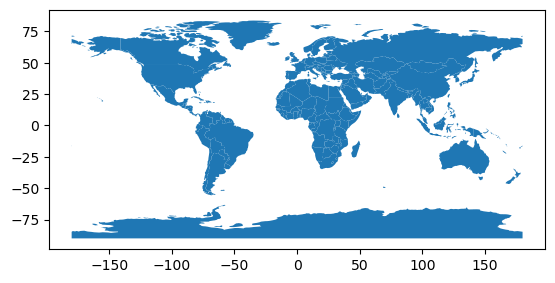

In [10]:
# plot the geometry
world.plot()
plt.show()

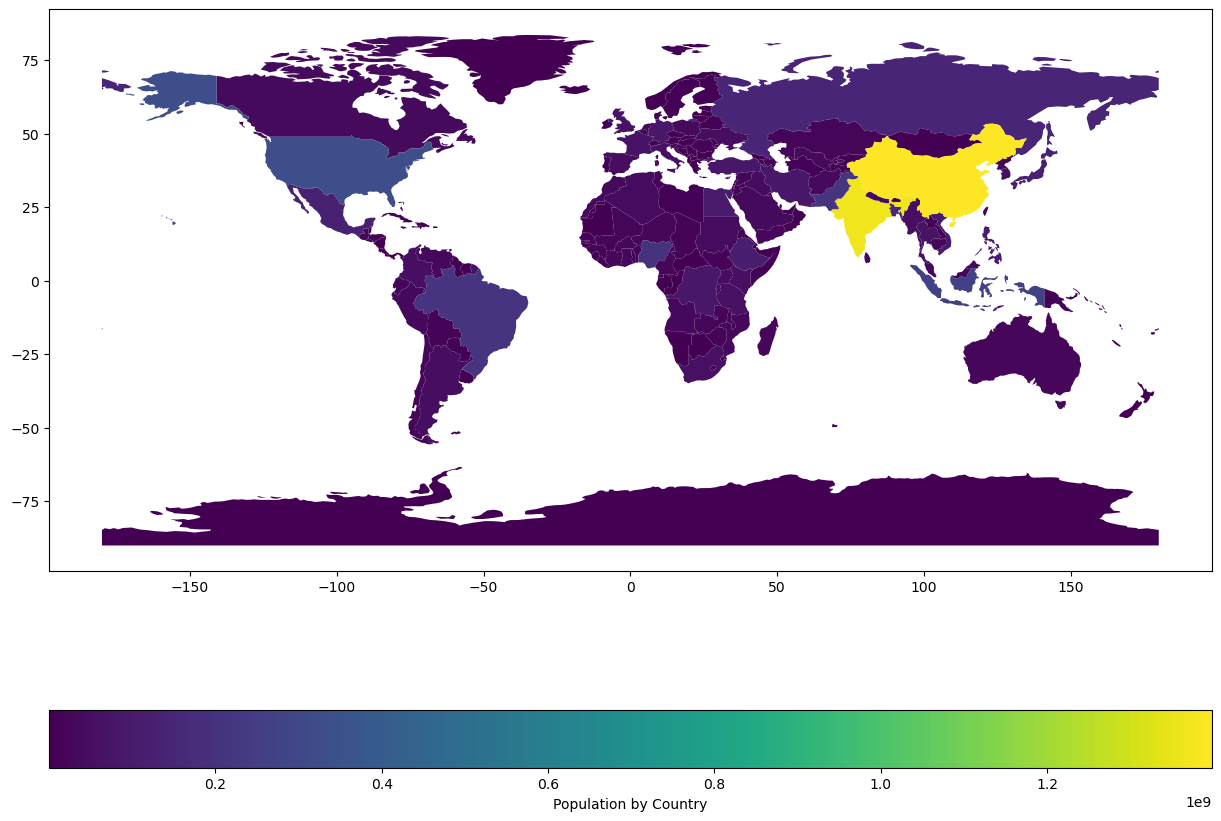

In [11]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))
 
# create the map
world.plot(column='pop_est', ax=ax, legend=True,
          legend_kwds={'label': "Population by Country",
                       'orientation': "horizontal"})
plt.show()

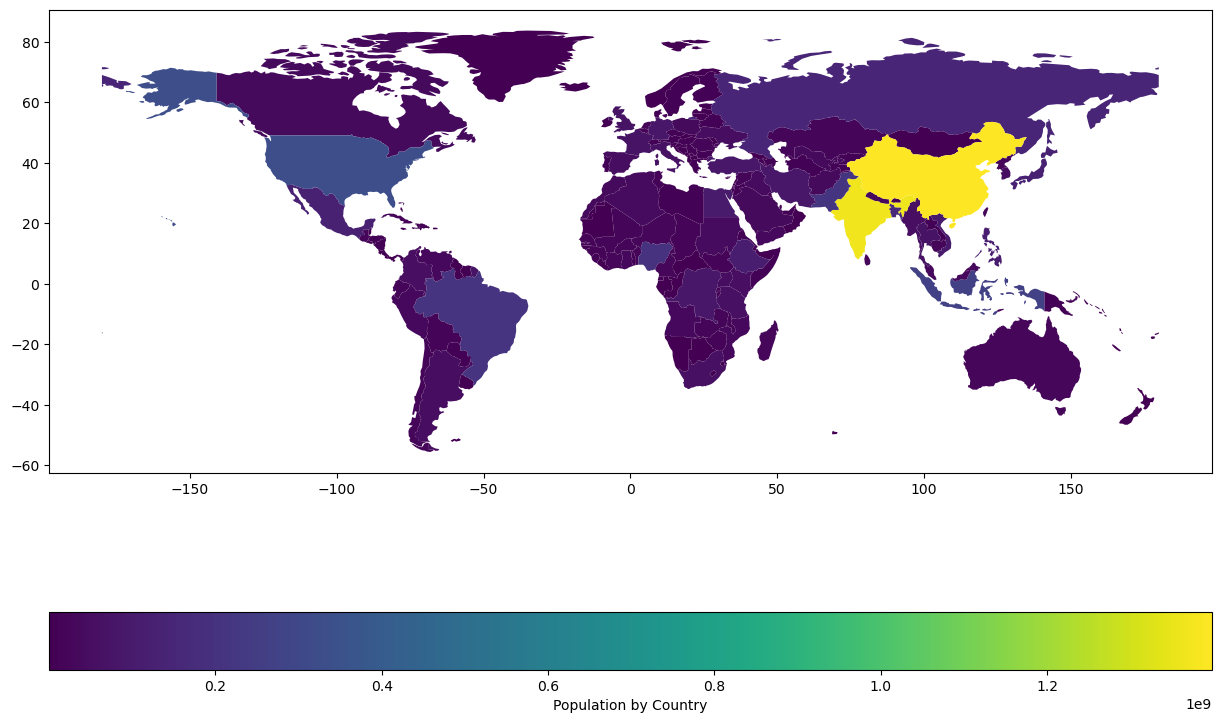

In [12]:
# filter the data-frame
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
 
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))
 
# create the map
world.plot(column='pop_est', ax=ax, legend=True,
          legend_kwds={'label': "Population by Country",
                       'orientation': "horizontal"})
plt.show()

In [13]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [14]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [15]:
cities.shape

(243, 2)

In [16]:
# the data types
cities.dtypes

name          object
geometry    geometry
dtype: object

In [17]:
cities.describe()

,name,geometry
count,243,243
unique,243,243
top,Vatican City,POINT (12.4533865 41.9032822)
freq,1,1


In [18]:
# print the active geometry
cities.geometry.name

'geometry'

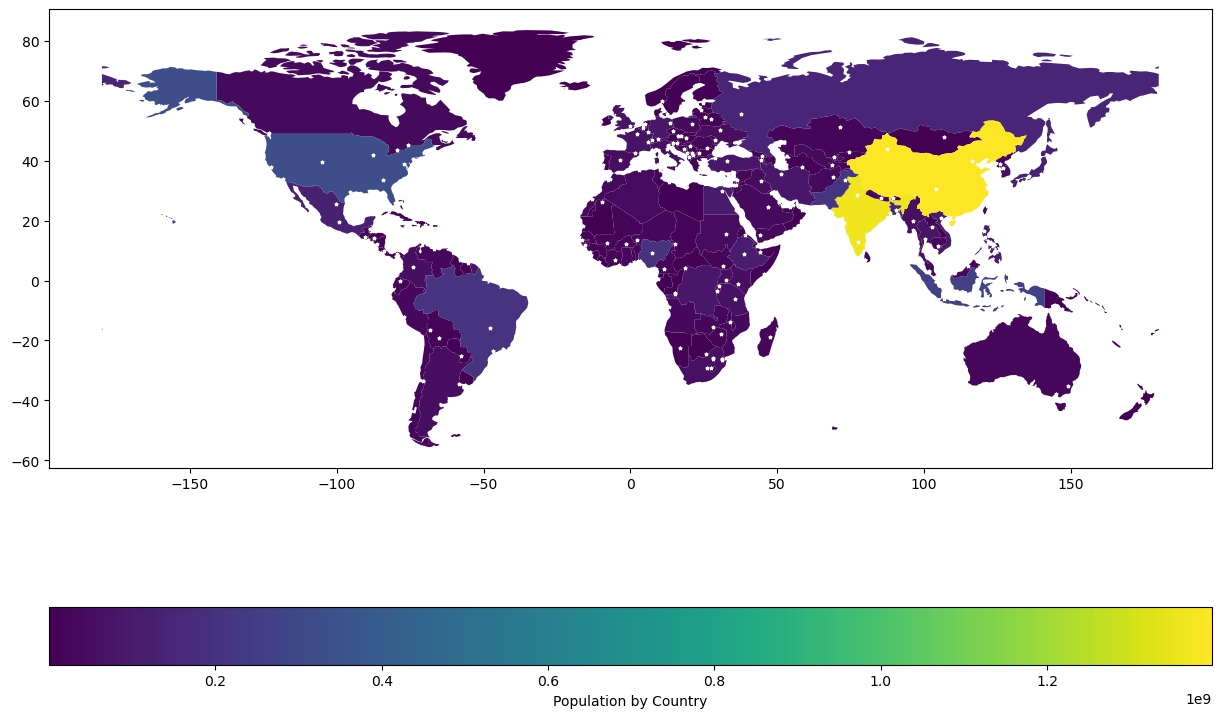

In [19]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))
 
# a layer of countries
world.plot(column='pop_est', ax=ax, legend=True,
          legend_kwds={'label': "Population by Country",
                       'orientation': "horizontal"})
 
# a layer of cities
cities.plot(ax=ax ,marker='*', color='white', markersize=5)
plt.show()